# Feature Extraction

## Zero Crossing Rate

Here the main idea is to process the audio in such a way that we can extract more hidden features out of it.

Zero-crossing rate is the rate of sign-changes along with a signal.

The rate at which the signal changes from positive to negative or back

Each time the signal crosses from (+) to (-) boundary it counts as 1.

In [1]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

In [2]:
! dir


 Volume in drive C has no label.
 Volume Serial Number is E6A4-8B48

 Directory of C:\Users\HP\Audio Processing

09-12-2023  22:21    <DIR>          .
09-12-2023  19:49    <DIR>          ..
09-12-2023  22:13    <DIR>          .ipynb_checkpoints
09-12-2023  21:50        43,557,767 Audio Processing.ipynb
09-12-2023  21:57         7,071,564 Beat Retrival from Music.ipynb
09-12-2023  21:37         2,447,277 bensound-breath.mp3
09-12-2023  19:54         6,796,585 bensound-riddledwitherrors.mp3
09-12-2023  21:36         4,469,781 bensound-urban.mp3
09-12-2023  22:21             2,683 Feature Extraction.ipynb
09-12-2023  22:12         2,415,112 Music Generator.ipynb
09-12-2023  22:10           882,044 stereo_file.wav
09-12-2023  22:11         1,323,044 stereo_file2.wav
09-12-2023  21:14        24,915,500 temp_file_1.wav
09-12-2023  21:15        37,373,228 temp_file_48000.wav
              11 File(s)    131,254,585 bytes
               3 Dir(s)  68,686,548,992 bytes free


In [3]:
source_audio= 'bensound-orangemoon.mp3'

In [4]:
wave_x, sample_rate = librosa.load(source_audio) # for loading the audio

In [5]:
ipd.Audio(wave_x, rate= sample_rate)

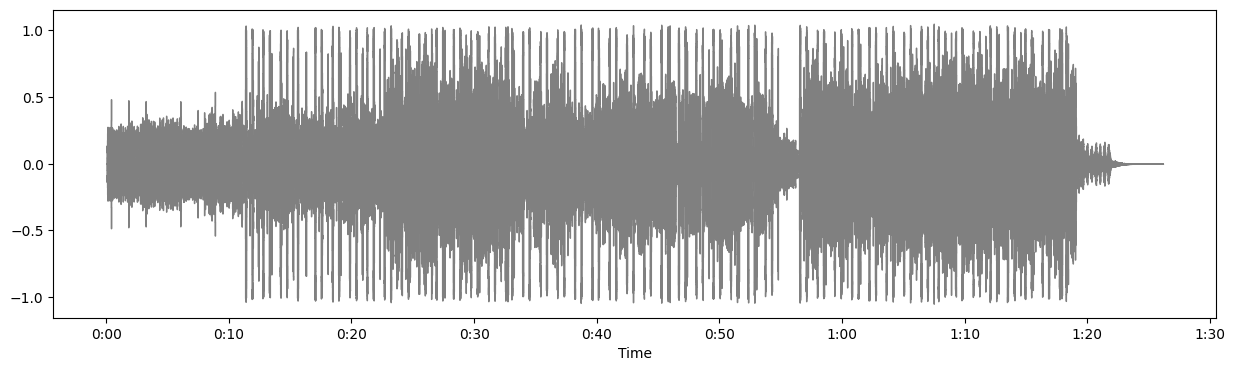

In [7]:
plt.figure(figsize=(15,4), facecolor=(1,1,1)) # defining the plot size
librosa.display.waveshow(wave_x, sr= sample_rate, color='gray') # we are passing the array, sample rate, colour of the graph

In [8]:
wave_x.shape # number of samples

(1900224,)

In [9]:
wave_x

array([-1.3969839e-09, -3.7252903e-09,  0.0000000e+00, ...,
        1.6261622e-06,  1.5611811e-06,  1.6887019e-06], dtype=float32)

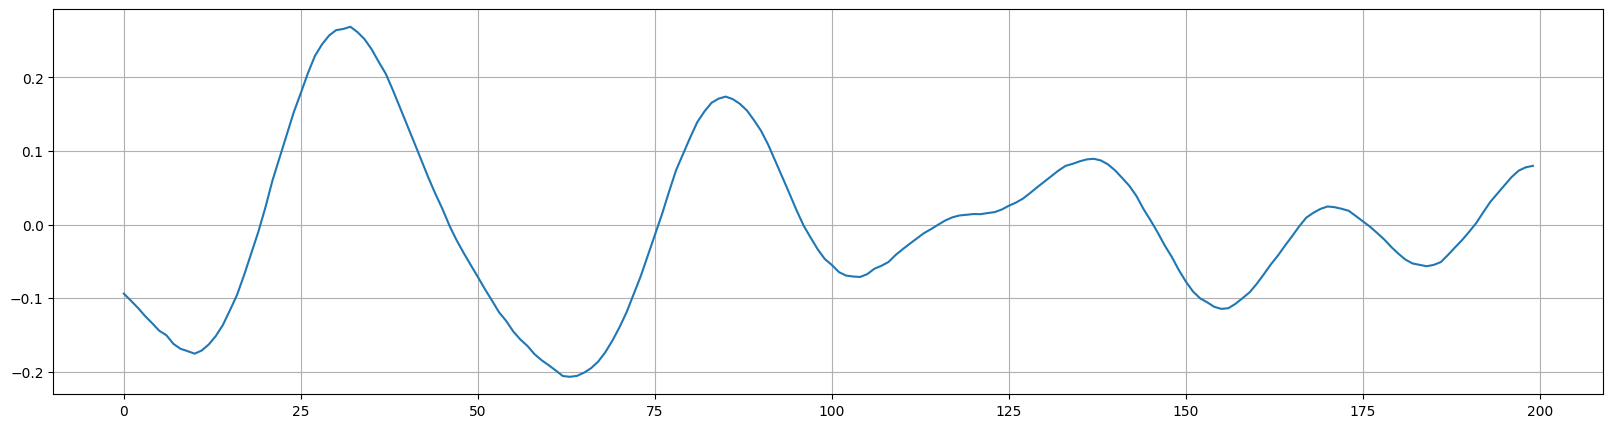

In [12]:
# If we want to zoom in
n0=10000
n1=10200
plt.figure(figsize=(20,5))
plt.plot(wave_x[n0:n1]) # from n0-n1, we are ploting, to understand how many zero-crossings are there in this given sampkle
plt.grid()

In [15]:
zero_crossings=librosa.zero_crossings(wave_x[n0:n1], pad= False)
print(sum(zero_crossings))

9


This tells us the number of times, zero crossing happens within the given range (n0-n1)

In [19]:
zero_crossings=librosa.zero_crossings(wave_x, pad= False)
print(sum(zero_crossings))

91733


This tells us the number of times, zero crossing happens within the given entire range.

In [22]:
# we then define a function to get the number of zero crossings, from the given file_name
def get_zero_crossings_count(file_name):
    temp_wave_x, temp_sample_rate = librosa.load(file_name) # laoding the file
    zero_crossings_count=librosa.zero_crossings(temp_wave_x, pad= False) # counting the number of zero crossings
    return(sum(zero_crossings_count)) # adding and presenting the sum

In [23]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is E6A4-8B48

 Directory of C:\Users\HP\Audio Processing

09-12-2023  22:35    <DIR>          .
09-12-2023  19:49    <DIR>          ..
09-12-2023  22:13    <DIR>          .ipynb_checkpoints
09-12-2023  21:50        43,557,767 Audio Processing.ipynb
09-12-2023  21:57         7,071,564 Beat Retrival from Music.ipynb
09-12-2023  21:37         2,447,277 bensound-breath.mp3
09-12-2023  22:23         2,072,367 bensound-orangemoon.mp3
09-12-2023  19:54         6,796,585 bensound-riddledwitherrors.mp3
09-12-2023  21:36         4,469,781 bensound-urban.mp3
09-12-2023  22:35         5,202,690 Feature Extraction.ipynb
09-12-2023  22:12         2,415,112 Music Generator.ipynb
09-12-2023  22:10           882,044 stereo_file.wav
09-12-2023  22:11         1,323,044 stereo_file2.wav
09-12-2023  21:14        24,915,500 temp_file_1.wav
09-12-2023  21:15        37,373,228 temp_file_48000.wav
              12 File(s)    138,526,959 bytes
             

In [24]:
# lets see another music's zero_crossings_count 
print(get_zero_crossings_count('bensound-breath.mp3'))

146056


In [25]:
# lets see another music's zero_crossings_count 
print(get_zero_crossings_count('bensound-riddledwitherrors.mp3'))

745640
